# Psych 100A January 7, 2020

# Westvaco: The Whole Thing
Robert Martin was laid off from his job at Westvaco, Inc. soon after he turned 55 years old. He sued for age discrimination. How do we evaluate his claim?

Ages of all employees in the department: 25, 33, 35, 38, 48, 55, 55, 55, 56, 64

Ages of the 3 employees who were fired: 55, 55, 64

<div class="alert alert-block alert-warning">
<b>PollEV:</b> Do you think Robert Martin has a good case? Was this age discrimination? Or do you think the company has a case for arguing that age was not the reason Martin was fired? Explain your answer.
</div>

## 1. The Data
What data are relevant to evaluating the claim for discrimination?

In [1]:
# Get the ages of everyone in the department into an R object named "age", and print out the contents of age
age <- c(25, 33, 35, 38, 48, 55, 55, 55, 56, 64)
age

[1] 25 33 35 38 48 55 55 55 56 64

In [2]:
# Get ages for those fired into an R object named "fired", and print the contents of fired
fired <- c(55,55,64)
fired

[1] 55 55 64

In [3]:
# Calculate the mean age for everyone and for the three people fired
mean(age)
mean(fired)

[1] 46.4

[1] 58

## 2. The DGP (Data Generating Process)
We know which of the 10 people in this department got fired. And, we know they were older on average than the rest. But what we really want to know is: what is the Data Generating Process? Does age play a role in determining who gets fired, or could the apparent association between age and being fired be simply the result of random processes?

### 2.1 Represent the possible DGP in word equations
1. *fired = age* (possible?)
2. *fired = age + other stuff* (what is the other stuff?)
3. *fired = other stuff*

### 2.2 Simulate random

In [4]:
# We can use R to simulate a random process. Let's take the 10 ages (each representing an employee), 
# and randomly choose three to fire. Save the result in fired.rand, and print out fired.rand.
fired.rand <- sample(age, 3)
fired.rand

[1] 35 64 33

<div class="alert alert-block alert-warning">
    <b>QUESTION:</b> What would happen if you run this code again? Try it.
</div>

In [5]:
# Let's take 3 random samples and save the results (using do()) in a data frame fired.rand. Print out fired.rand.
fired.rand <- do(3) * sample(age, 3)
fired.rand

V1,V2,V3
<dbl>,<dbl>,<dbl>
35,55,33
48,55,33
35,48,38


<div class="alert alert-block alert-warning">
    <b>QUESTION:</b> Can you figure out a way to get the mean age of those fired for each simulation?
</div>

In [6]:
# Method 1
fired.rand$mean <- (fired.rand$V1 + fired.rand$V2 + fired.rand$V3)/3
fired.rand

V1,V2,V3,mean
<dbl>,<dbl>,<dbl>,<dbl>
35,55,33,41.00000
48,55,33,45.33333
35,48,38,40.33333


In [7]:
# Method 2
fired.rand <- do(3) * mean(sample(age, 3))
fired.rand

mean
<dbl>
40.66667
45.33333
41.33333


<div class="alert alert-block alert-warning">
    <b>QUESTION:</b> Why do these numbers vary across the 3 simulations?
</div>

## 3. A Sampling Distribution
Now we can return to our two possible models of the DGP:
1. *fired = age + other stuff*
2. *fired = other stuff*
We can simulate the second model. If we do that, we can then see **how likely our actual data (e.g., the mean age of employees who were fired) would be to occur *IF* the second (completely random) model were true.**

### 3.1 Creating a sampling distribution

In [8]:
# Create a data frame (fired.rand) with the mean ages fired for 1000 simulated firings
fired.rand <- do(1000) * mean(sample(age, 3))
glimpse(fired.rand)

Observations: 1,000
Variables: 1
$ mean <dbl> 39.66667, 47.00000, 45.33333, 58.00000, 52.66667, 52.66667, 42.6…


### 3.2 Graphing a sampling distribution

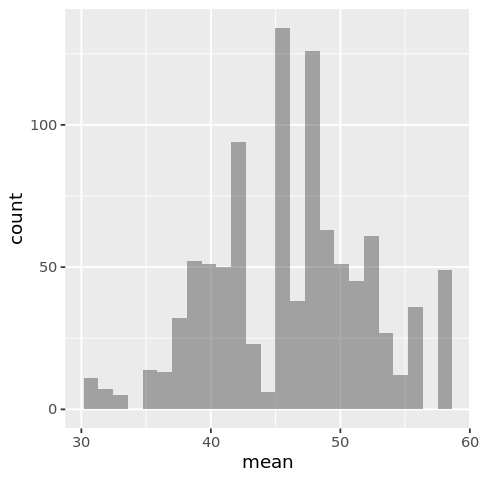

In [9]:
# Make a histogram of the sampling distribution of mean ages of those fired
gf_histogram(~ mean, data=fired.rand)

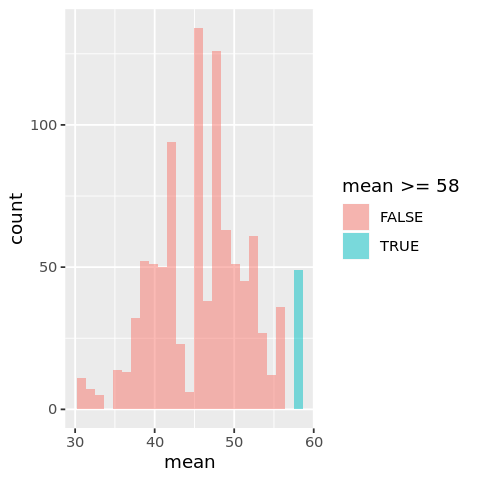

In [10]:
# Shade in the proportion of simulated samples that had average ages of 58 or higher
gf_histogram(~ mean, data=fired.rand, fill=~mean>=58)

### 3.3 Thinking about the sampling distribution

In [11]:
# Calculate the mean of the sampling distribution here
mean(fired.rand$mean)

[1] 46.23433

<div class="alert alert-block alert-warning">
<b>PollEV:</b> Why do you think the mean of this sampling distribution is so close to the mean of the 10 ages in the original data?
</div>

### 3.4 Using the sampling distribution
Let's use the sampling distribution to help us think about the alternative models of the DGP. How likely is it that we would have obtained and average age of 58 for fired employees if we had just fired people randomly?

In [12]:
# How many of the 1000 simulated samples had a mean age of 58 or greater?
tally(~ mean >= 58, data=fired.rand)

mean >= 58
 TRUE FALSE 
   49   951 

In [13]:
# What proportion of the 1000 simulated samples had a mean age of 58 or greater?
tally(~ mean >= 58, data=fired.rand, format="proportion")

mean >= 58
 TRUE FALSE 
0.049 0.951 